# Copolymerization Fit

## Overview

The `polykin.copolymerization` module includes a fairly generic method to estimate reactivity ratios from binary copolymer composition data. Arbitrary combinations of instantaneous copolymer composition data and comonomer/copolymer composition drift data can be regressed. Specifically, the method can process data in one of 3 forms: $F(f)$, $f(x;f_0)$, or $F(x;f_0)$. We will start with some examples of $F(f)$ data fitting and conclude with an example involving with all types of datasets.

## $F(f)$ data

### Benchmark: van Herk & Dröge (1997)

[van Herk & Dröge (1997)](https://research.tue.nl/files/1500487/617672.pdf) discuss various approaches to estimating the reactivity ratios and their respective statistical uncertainties. Let's replicate certain elements of their study using the $F(f)$ data for MMA(1)-DMA(2) as reported in Table 1.

In [1]:
# %pip install polykin
from polykin.copolymerization.fitting import fit_copo_data, CopoDataset_Ff
from numpy import array

In [2]:
f1 = array([0.100, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800])
F1 = array([0.059, 0.243, 0.364, 0.486, 0.583, 0.721, 0.824])

Let's begin by fitting the data using the nonlinear least squares (NLLS) method, assuming that all $F$ data points have the same _absolute_ error. In this scenario, the scaling for $f$ and $F$ is arbitrary. The first step is to pack the experimental data into a `CopoDataset_Ff`.

In [3]:
data = CopoDataset_Ff(name="van Herk & Dröge (1997)",
                      f1=f1, F1=F1, scale_f1=1., scale_F1=1.)

Now, we launch the regression. By default, the joint confidence (JCR) region will be generated using an approximate method. For comparison, let's also activate the exact JCR. 

method:  NLLS
M1:      M1
M2:      M2
r1:      1.43E+00
r2:      1.67E+00
alpha:   0.05
se_r1:   9.08E-02
se_r2:   1.08E-01
ci_r1:   2.33E-01
ci_r2:   2.77E-01
cov:     [[0.0082368  0.00863158]
 [0.00863158 0.0116331 ]]

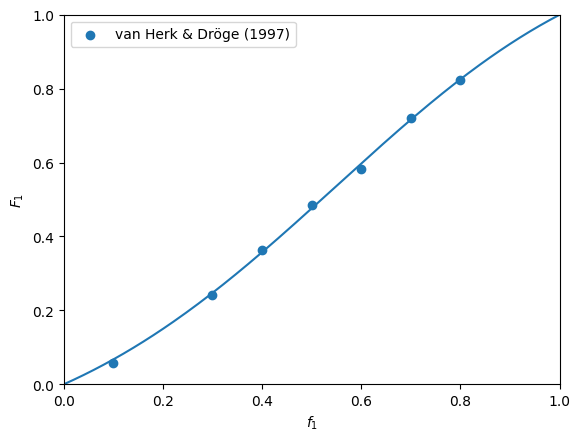

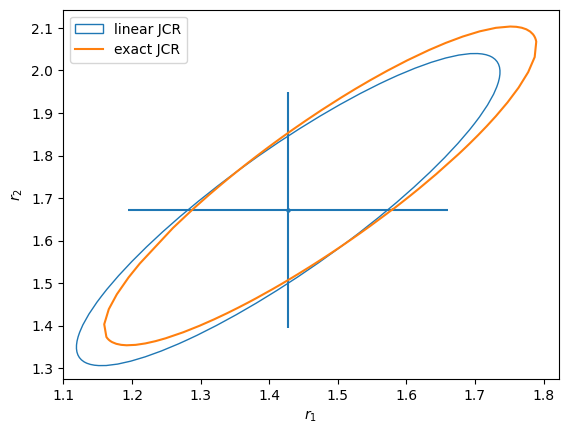

In [4]:
fit_copo_data(data_Ff=[data], JCR_exact=True)

The point estimates match those reported in Table 3 of the aforementioned reference. The blue horizontal and vertical lines represent the individual confidence intervals of $r_1$ and $r_2$. A difference between the linear (approximate) and exact JCR is visible, but fairly small.

Now, let's try the orthogonal distance regression (ODR) method, also known as errors-in-variables, assuming absolute standard deviations of 5% for $F$ and 1% for $f$. In this case, the scale factors to matter, because they influence how the fit error is distributed between $f$ and $F$.

In [5]:
data = CopoDataset_Ff(name="van Herk & Dröge (1997)",
                      f1=f1, F1=F1, scale_f1=0.01, scale_F1=0.05)

method:  ODR
M1:      M1
M2:      M2
r1:      1.43E+00
r2:      1.67E+00
alpha:   0.05
se_r1:   9.10E-02
se_r2:   1.08E-01
ci_r1:   2.34E-01
ci_r2:   2.79E-01
cov:     [[0.00828527 0.00871396]
 [0.00871396 0.01176538]]

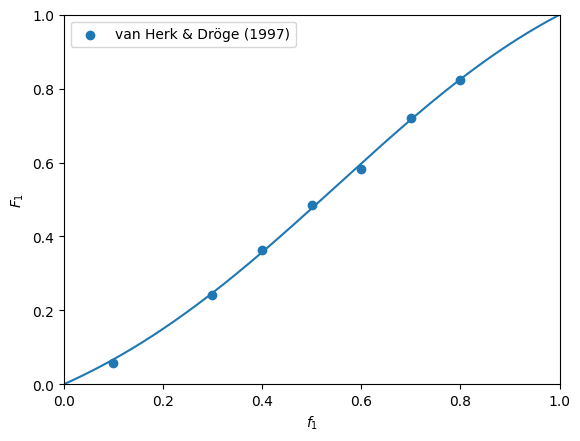

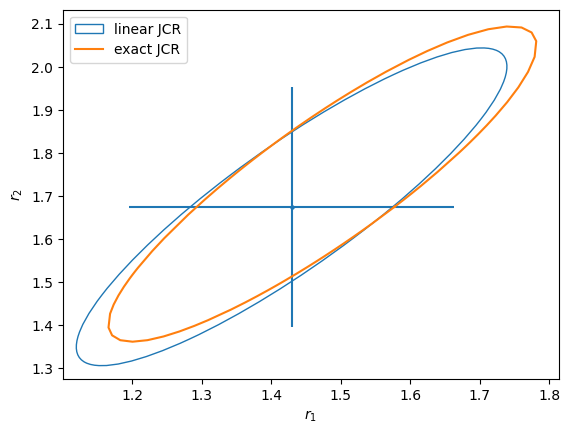

In [6]:
fit_copo_data(data_Ff=[data], method='ODR', JCR_exact=True)

As expected, we get almost the same parameter estimates, because the data is smooth and $\sigma_f$ is low. Finally, for comparison, we also try fitting the data set with _relative_ standard deviations. 

In [7]:
data = CopoDataset_Ff(name="van Herk & Dröge (1997)",
                      f1=f1, F1=F1, scale_f1=0.01*f1, scale_F1=0.05*F1)

method:  ODR
M1:      M1
M2:      M2
r1:      1.71E+00
r2:      1.95E+00
alpha:   0.05
se_r1:   1.18E-01
se_r2:   7.46E-02
ci_r1:   3.03E-01
ci_r2:   1.92E-01
cov:     [[0.01388988 0.0069102 ]
 [0.0069102  0.00555906]]

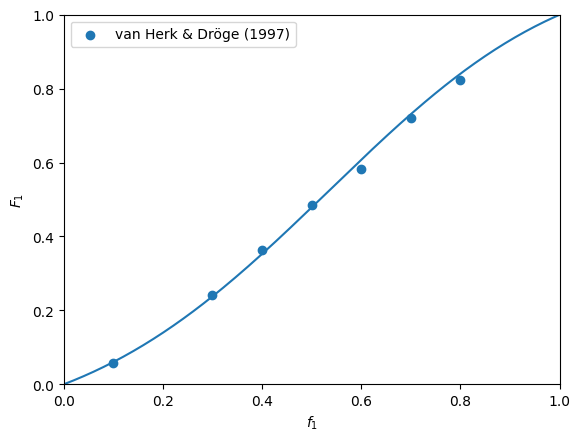

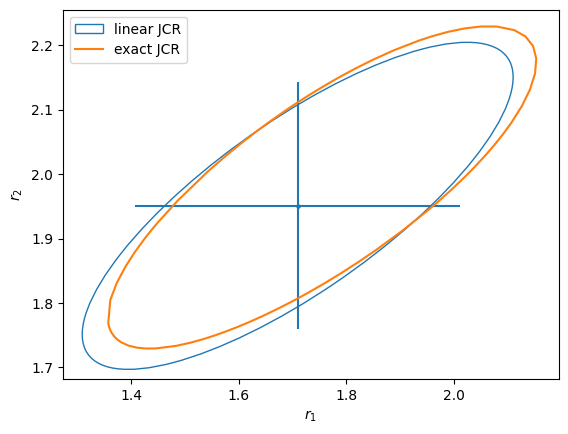

In [8]:
fit_copo_data(data_Ff=[data], method='ODR', JCR_exact=True)

In this case, the point estimates of the reactivity ratio estimates are a bit higher. As before, the values are in perfect agreement with those reported in Table 3 of van Herk & Dröge (1997).

### Benchmark: Harrison's example (2024)

This example poses a greater numerical challenge compared to the previous one due to the significant difference in reactivity between the two monomers.

In [9]:
f1 = array([0.100, 0.200, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800, 0.900, 0.100, 0.200, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800, 0.900])
F1 = array([0.010, 0.008, 0.035, 0.036, 0.035, 0.059, 0.088, 0.153, 0.257, 0.000, 0.012, 0.038, 0.042, 0.049, 0.079, 0.106, 0.149, 0.258])

In [10]:
data = CopoDataset_Ff(name="Harrison (2024)",
                      f1=f1, F1=F1, scale_f1=1., scale_F1=1.)

method:  NLLS
M1:      M1
M2:      M2
r1:      9.00E-03
r2:      1.91E+01
alpha:   0.05
se_r1:   6.47E-03
se_r2:   1.02E+00
ci_r1:   1.37E-02
ci_r2:   2.17E+00
cov:     [[4.18124314e-05 5.48833184e-03]
 [5.48833184e-03 1.04518256e+00]]

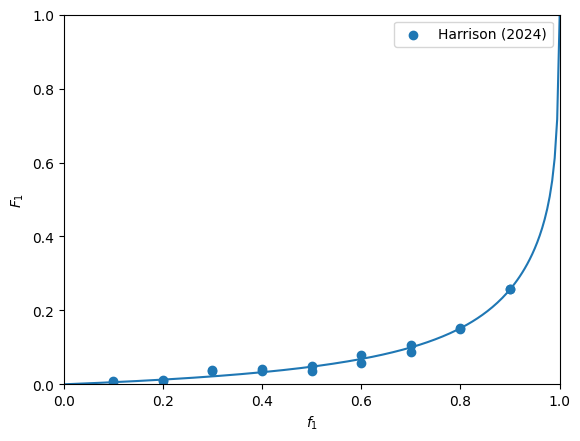

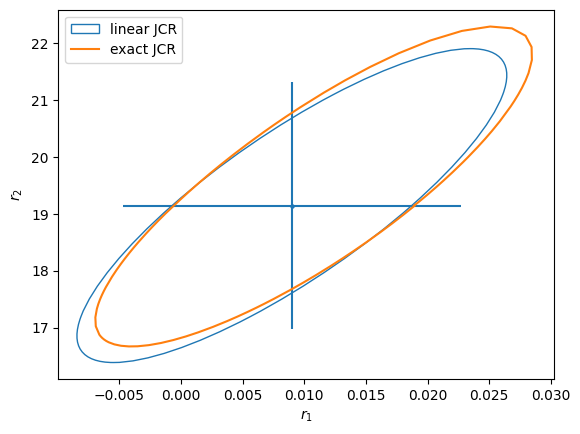

In [11]:
fit_copo_data(data_Ff=[data], JCR_exact=True)

Once more, the mathematical accuracy regarding point estimates and JCRs remains intact. It is worth noting that, unlike Harrison, we refrain from applying a logarithmic transformation to the parameters.

## Joint $F(f)$, $f(x;f_0)$, and $F(x;f_0)$ data

This final example aims to demonstrate how the fitting method can handle arbitrary combinations of the three types of copolymer composition data. Since we are not aware of any system for which all three types of data have been reliably measured and reported, we have generated artificial data for the purpose of this tutorial.

In [12]:
from polykin.copolymerization import CopoDataset_fx, CopoDataset_Fx

In [13]:
# 1 set of F(x) data
data_Ff = CopoDataset_Ff(name='Ff-1',
                         f1=array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         F1=array([0.17, 0.31, 0.43, 0.57, 0.72]),
                         scale_f1=1., scale_F1=1.)

In [14]:
# 3 sets of f(x;f0) data
data_fx_1 = CopoDataset_fx(name='fx-1',
                           f10=0.6,
                           x=array([0.2, 0.4, 0.6, 0.8, 0.9]),
                           f1=array([0.63, 0.68, 0.73, 0.83, 0.97]),
                           scale_x=1.0, scale_f1=1.0)

data_fx_2 = CopoDataset_fx(name='fx-2',
                           f10=0.4,
                           x=array([0.2, 0.4, 0.6, 0.8, 0.9]),
                           f1=array([0.42, 0.41, 0.42, 0.40, 0.43]),
                           scale_x=1.0, scale_f1=1.0)

data_fx_3 = CopoDataset_fx(name='fx-3',
                           f10=0.2,
                           x=array([0.2, 0.4, 0.6, 0.8, 0.9]),
                           f1=array([0.18, 0.18, 0.14, 0.12, 0.05]),
                           scale_x=1.0, scale_f1=1.0)

In [15]:
# 1 set of F(x;f0) data
data_Fx = CopoDataset_Fx(name='Fx-1',
                        f10=0.8,
                        x=array([0.2, 0.4, 0.6, 0.8, 0.9]),
                        F1=array([0.65, 0.67, 0.69, 0.77, 0.77]),
                        scale_x=1.0, scale_F1=1.0)

method:  NLLS
M1:      M1
M2:      M2
r1:      2.07E-01
r2:      5.05E-01
alpha:   0.05
se_r1:   9.72E-03
se_r2:   1.37E-02
ci_r1:   2.01E-02
ci_r2:   2.83E-02
cov:     [[9.44785240e-05 7.26499847e-05]
 [7.26499847e-05 1.86731455e-04]]

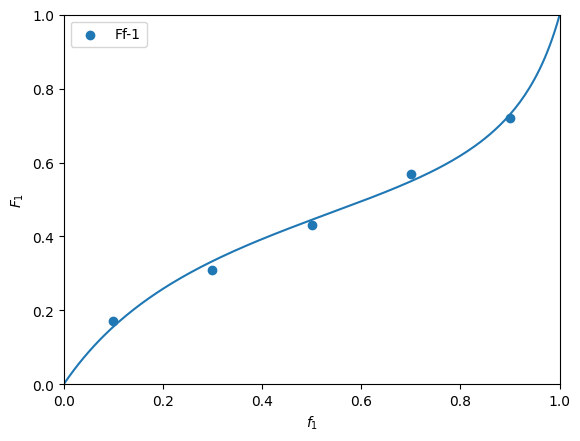

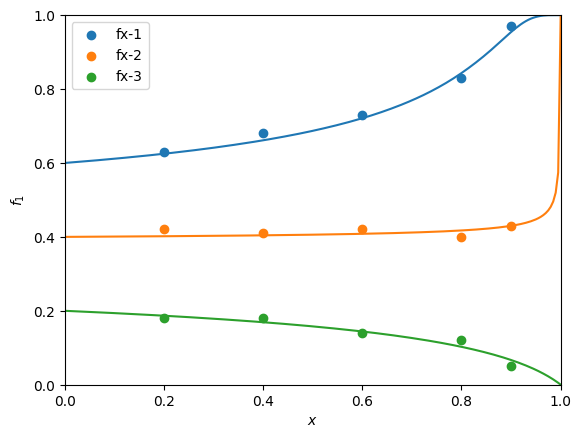

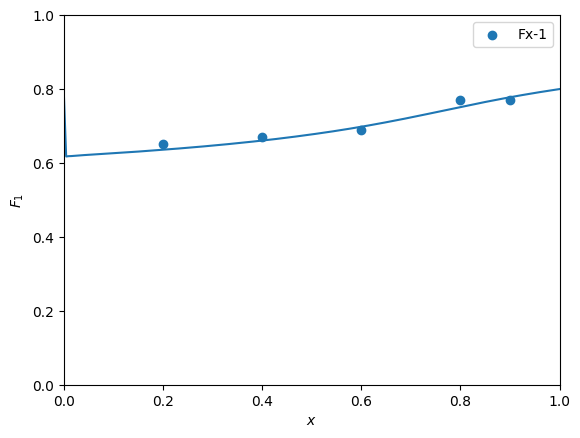

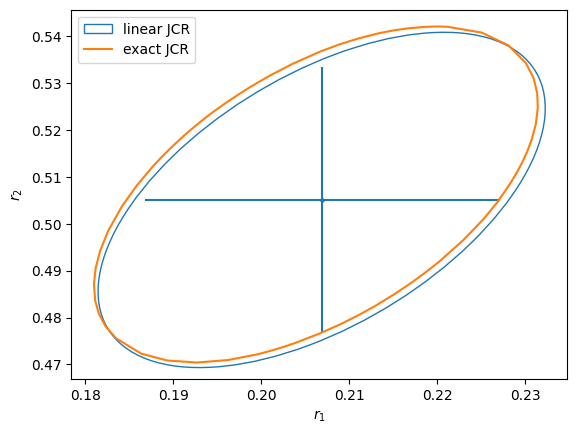

In [16]:
fit_copo_data(data_Ff=[data_Ff],
              data_fx=[data_fx_1, data_fx_2, data_fx_3],
              data_Fx=[data_Fx],
              JCR_exact=True)	

## Summary

* Efficient and validated NLLS and ODR (error-in-variables) methods.
* Linear and exact JCRs. IMO, the linear approximation seems to be good enough in most cases (but the only way to know it, was to compute the exact JCR ;)). 